In [1]:
from fastai.vision.all import *
# from utils import *

In [2]:
path = Path('/root/Documents/images')

In [3]:
path.ls()

(#144) [Path('/root/Documents/images/Amblyglyphidodon aureus'),Path('/root/Documents/images/Carassius auratus'),Path('/root/Documents/images/Abudefduf vaigiensis'),Path('/root/Documents/images/Cyprinella lutrensis'),Path('/root/Documents/images/Luxilus cornutus'),Path('/root/Documents/images/Chrysiptera taupou'),Path('/root/Documents/images/Phoxinus phoxinus'),Path('/root/Documents/images/Abudefduf sexfasciatus'),Path('/root/Documents/images/Notropis hudsonius'),Path('/root/Documents/images/Hesperoleucus symmetricus')...]

In [4]:
df_path = Path('/root/Documents/')
# df_path = Path('/workspace/Notebooks/')
df = pd.read_csv(df_path/"csv/families_3.csv")

In [5]:
set(df['Family'])

{'Centrarchidae', 'Cyprinidae', 'Pomacentridae'}

In [6]:
df

,Order,Family,Subfamily,Genus,Specie,fname,is_valid
0,Cypriniformes,Cyprinidae,Xenocyprinae,Hypophthalmichthys,Hypophthalmichthys molitrix,Hypophthalmichthys molitrix/35458230.jpg,False
1,Perciformes,Pomacentridae,Pomacentrinae,Dascyllus,Dascyllus trimaculatus,Dascyllus trimaculatus/13260279.jpg,False
2,Perciformes,Centrarchidae,NaN,Micropterus,Micropterus dolomieu,Micropterus dolomieu/94521526.jpg,False
3,Cypriniformes,Cyprinidae,Cyprininae,Cyprinus,Cyprinus carpio,Cyprinus carpio/89160603.jpg,False
4,Perciformes,Pomacentridae,Pomacentrinae,Abudefduf,Abudefduf sordidus,Abudefduf sordidus/41710167.jpg,False
...,...,...,...,...,...,...,...
86383,Cypriniformes,Cyprinidae,Gobioninae,Pseudorasbora,Pseudorasbora parva,Pseudorasbora parva/65482784.jpg,True
86384,Cypriniformes,Cyprinidae,Ex-danioninae,Parazacco,Parazacco spilurus,Parazacco spilurus/61744233.jpg,True
86385,Perciformes,Centrarchidae,NaN,Micropterus,Micropterus salmoides,Micropterus salmoides/19167043.jpg,True
86386,Perciformes,Centrarchidae,NaN,Lepomis,Lepomis macrochirus,Lepomis macrochirus/24903221.jpg,True


# Non-branch

In [7]:
fishes = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=ColSplitter(),
                 get_x = ColReader(5, pref=path),
                 get_y=ColReader(4),
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = fishes.dataloaders(df)

In [13]:
dls.train_ds, dls.valid_ds

((#69110) [(PILImage mode=RGB size=768x1024, TensorCategory(62)),(PILImage mode=RGB size=1024x768, TensorCategory(58)),(PILImage mode=RGB size=768x1024, TensorCategory(79)),(PILImage mode=RGB size=1024x768, TensorCategory(52)),(PILImage mode=RGB size=768x1024, TensorCategory(6)),(PILImage mode=RGB size=1024x768, TensorCategory(69)),(PILImage mode=RGB size=1024x715, TensorCategory(130)),(PILImage mode=RGB size=1024x768, TensorCategory(108)),(PILImage mode=RGB size=1024x768, TensorCategory(118)),(PILImage mode=RGB size=1024x768, TensorCategory(53))...],
 (#17278) [(PILImage mode=RGB size=1024x768, TensorCategory(92)),(PILImage mode=RGB size=768x1024, TensorCategory(117)),(PILImage mode=RGB size=1024x768, TensorCategory(83)),(PILImage mode=RGB size=1024x768, TensorCategory(83)),(PILImage mode=RGB size=768x1024, TensorCategory(26)),(PILImage mode=RGB size=576x1024, TensorCategory(79)),(PILImage mode=RGB size=988x742, TensorCategory(8)),(PILImage mode=RGB size=768x1024, TensorCategory(48)),

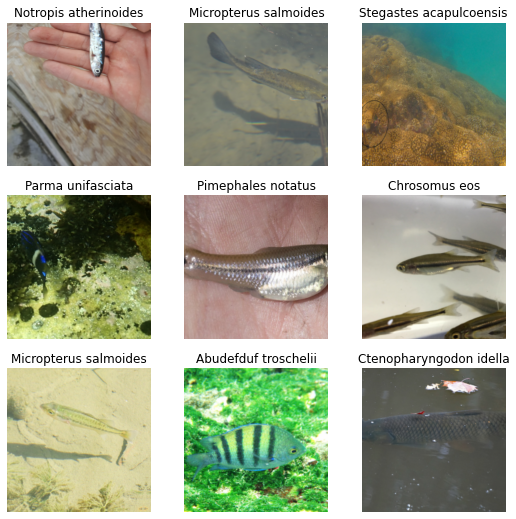

In [14]:
dls.show_batch(nrows=3, ncols=3)

In [15]:
class VGGCustomModel(Module):
    def __init__(self, encoder, head):
        self.encoder = encoder
        self.head = head
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.head(x)
        return x

In [16]:
def custom_splitter(model):
    return [params(model.encoder),
            params(model.head)]

In [17]:
model = vgg16_bn
body = create_body(model, cut=-2)
head = create_head(512*2,dls.c)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


In [18]:
model = VGGCustomModel(body, head)

In [20]:
dls.vocab

['Abramis brama', 'Abudefduf abdominalis', 'Abudefduf bengalensis', 'Abudefduf saxatilis', 'Abudefduf septemfasciatus', 'Abudefduf sexfasciatus', 'Abudefduf sordidus', 'Abudefduf troschelii', 'Abudefduf vaigiensis', 'Acanthochromis polyacanthus', 'Acrossocheilus paradoxus', 'Alburnus alburnus', 'Alburnus arborella', 'Ambloplites rupestris', 'Amblyglyphidodon aureus', 'Amblyglyphidodon curacao', 'Amblyglyphidodon leucogaster', 'Amphiprion bicinctus', 'Amphiprion chrysopterus', 'Amphiprion clarkii', 'Amphiprion frenatus', 'Amphiprion melanopus', 'Amphiprion ocellaris', 'Amphiprion percula', 'Amphiprion perideraion', 'Amphiprion polymnus', 'Barbus barbus', 'Barbus plebejus', 'Campostoma anomalum', 'Candidia barbata', 'Carassius auratus', 'Carassius gibelio', 'Centrarchus macropterus', 'Chromis atripectoralis', 'Chromis chromis', 'Chromis cyanea', 'Chromis hypsilepis', 'Chromis margaritifer', 'Chromis multilineata', 'Chromis notata', 'Chromis punctipinnis', 'Chromis ternatensis', 'Chromis 

In [21]:
learn = Learner(dls, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy,
                   splitter=custom_splitter).to_fp16()
learn.freeze()

In [22]:
learn.summary()

VGGCustomModel (Input shape: ['64 x 3 x 336 x 336'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 336 x 336  1,792      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 336 x 336  128        True      
________________________________________________________________
ReLU                 64 x 64 x 336 x 336  0          False     
________________________________________________________________
Conv2d               64 x 64 x 336 x 336  36,928     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 336 x 336  128        True      
________________________________________________________________
ReLU                 64 x 64 x 336 x 336  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 168 x 168  0          False     
_____________________________________________

In [23]:
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.822703,1.458428,0.605336,08:17


In [24]:
learn.unfreeze()
learn.fit_one_cycle(12, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.664955,1.440812,0.607999,09:40
1,1.604492,1.385452,0.622294,09:39
2,1.539113,1.324643,0.636011,09:39
3,1.474334,1.280281,0.646545,09:40
4,1.432542,1.236148,0.657310,09:40
5,1.406718,1.201319,0.665528,09:41
6,1.355372,1.181376,0.671779,09:40
7,1.319730,1.165722,0.672763,09:40
8,1.326029,1.150754,0.679940,09:38
9,1.317764,1.149578,0.679940,09:39


In [25]:
learn.save('species144-nobranch-fepochs1-uepochs12')

Path('models/species144-nobranch-fepochs1-uepochs12.pth')

In [26]:
learn.export('species144-nobranch-fepochs1-uepochs12')

# Branch-CNN

In [8]:
from torchvision.models.utils import load_state_dict_from_url

In [9]:
cfgs = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

model_urls = {
    'vgg11': 'https://download.pytorch.org/models/vgg11-bbd30ac9.pth',
    'vgg13': 'https://download.pytorch.org/models/vgg13-c768596a.pth',
    'vgg16': 'https://download.pytorch.org/models/vgg16-397923af.pth',
    'vgg19': 'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth',
    'vgg11_bn': 'https://download.pytorch.org/models/vgg11_bn-6002323d.pth',
    'vgg13_bn': 'https://download.pytorch.org/models/vgg13_bn-abd245e5.pth',
    'vgg16_bn': 'https://download.pytorch.org/models/vgg16_bn-6c64b313.pth',
    'vgg19_bn': 'https://download.pytorch.org/models/vgg19_bn-c79401a0.pth',
}


def _vgg(arch, cfg, batch_norm, pretrained, progress, **kwargs):
    if pretrained:
        kwargs['init_weights'] = False
    model = VGG(make_layers(cfgs[cfg], batch_norm=batch_norm), **kwargs)
    if True:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model


class VGG(nn.Module):
    def __init__(self, features, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        self.features = features
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)


def make_layers(cfg, batch_norm=False):
    layers = []
    in_channels = 3
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)

def vgg16_bn(pretrained=False, progress=True, **kwargs):
    r"""VGG 16-layer model (configuration "D") with batch normalization
    `"Very Deep Convolutional Networks For Large-Scale Image Recognition" <https://arxiv.org/pdf/1409.1556.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _vgg('vgg16_bn', 'D', True, pretrained, progress, **kwargs)

In [10]:
model = vgg16_bn
body = create_body(model, cut=-2)
body

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [11]:
head = create_head(512*2,dls.c)
head

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=144, bias=False)
)

In [12]:
_body = body[0]
block1 = _body[:7]
block2 = _body[7:14]
block3 = _body[14:24]
block4 = _body[24:34]
block5 = _body[34:]

In [13]:
def custom_get_y(o):
    fine_label = o['Specie']
    coarse1_label = o['Family']
    return [coarse1_label, fine_label]

In [29]:
class VGGCustomModel(Module):
    def __init__(self, encoder, head):
        self.encoder = encoder
        encoder = encoder[0]
        self.block1 = encoder[:7]
        self.block2 = encoder[7:14]
        self.block3 = encoder[14:24]
        self.branch1 = create_head(256*2, len(set(df['Family'])))
        self.block4 = encoder[24:34]
        self.block5 = encoder[34:]
        self.head = head
    
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        coarse1_label = self.branch1(x)
        x = self.block4(x)
        x = self.block5(x)
        fine_label = self.head(x)
        return {
                'fine_label': fine_label,
                'coarse1_label': coarse1_label
               }

In [30]:
def loss_func(out, targ):
    return nn.CrossEntropyLoss()(out['fine_label'], targ['fine_label']) + \
            nn.CrossEntropyLoss()(out['coarse1_label'], targ['coarse1_label'])

In [31]:
# def custom_accuracy(inp, targ, axis=-1):
#     pred1,targ1 = flatten_check(inp['label1'].argmax(dim=axis), targ['label1'])
#     acc1 = (pred1 == targ1).float().mean()
#     pred2,targ2 = flatten_check(inp['label2'].argmax(dim=axis), targ['label2'])
#     acc2 = (pred2 == targ2).float().mean()
#     return (acc1+acc2)/2

def custom_accuracy(inp, targ, axis=-1):
    pred1,targ1 = flatten_check(inp['fine_label'].argmax(dim=axis), targ['fine_label'])
    acc1 = (pred1 == targ1).float().mean()
    return acc1

In [32]:
model = VGGCustomModel(body, head)

In [18]:
class CustomCategorize(DisplayedTransform):
    "Reversible transform of category string to `vocab` id"
    loss_func,order=CrossEntropyLossFlat(),1
    def __init__(self, vocab=None, vocab_coarse1=None, vocab_coarse2=None, sort=True, add_na=False, num_y=1):
        store_attr()
        self.vocab = None if vocab is None else CategoryMap(vocab, sort=sort, add_na=add_na)
        self.vocab_coarse1 = None if vocab_coarse1 is None else CategoryMap(vocab_coarse1, sort=sort, add_na=add_na)

    def setups(self, dsets):
        fine_dsets = [d[1] for d in dsets]
        coarse1_dsets = [d[0] for d in dsets]
        if self.vocab is None and dsets is not None: self.vocab = CategoryMap(fine_dsets, sort=self.sort, add_na=self.add_na)
        if self.vocab_coarse1 is None and dsets is not None: self.vocab_coarse1 = CategoryMap(coarse1_dsets, sort=self.sort, add_na=self.add_na)
        self.c = len(self.vocab)

    def encodes(self, o): return {'fine_label': TensorCategory(self.vocab.o2i[o[1]]),
                                  'coarse1_label': TensorCategory(self.vocab_coarse1.o2i[o[0]])
                                 }
    def decodes(self, o): return Category      (self.vocab    [o])

In [19]:
def CustomCategoryBlock(vocab=None, sort=True, add_na=False, num_y=1):
    "`TransformBlock` for single-label categorical targets"
    return TransformBlock(type_tfms=CustomCategorize(vocab=vocab, sort=sort, add_na=add_na))

In [20]:
def custom_splitter(model):
    return [params(model.block1),
            params(model.block2),
            params(model.block3),
            params(model.block4),
            params(model.block5),
            params(model.head)]

In [25]:
fishes = DataBlock(blocks = (ImageBlock, CustomCategoryBlock),
                 splitter=ColSplitter(),
                 get_x = ColReader(5, pref=path),
                 get_y=custom_get_y,
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = fishes.dataloaders(df)

In [26]:
dls.train_ds, dls.valid_ds

((#69110) [(PILImage mode=RGB size=768x1024, {'fine_label': TensorCategory(62), 'coarse1_label': TensorCategory(1)}),(PILImage mode=RGB size=1024x768, {'fine_label': TensorCategory(58), 'coarse1_label': TensorCategory(2)}),(PILImage mode=RGB size=768x1024, {'fine_label': TensorCategory(79), 'coarse1_label': TensorCategory(0)}),(PILImage mode=RGB size=1024x768, {'fine_label': TensorCategory(52), 'coarse1_label': TensorCategory(1)}),(PILImage mode=RGB size=768x1024, {'fine_label': TensorCategory(6), 'coarse1_label': TensorCategory(2)}),(PILImage mode=RGB size=1024x768, {'fine_label': TensorCategory(69), 'coarse1_label': TensorCategory(0)}),(PILImage mode=RGB size=1024x715, {'fine_label': TensorCategory(130), 'coarse1_label': TensorCategory(1)}),(PILImage mode=RGB size=1024x768, {'fine_label': TensorCategory(108), 'coarse1_label': TensorCategory(1)}),(PILImage mode=RGB size=1024x768, {'fine_label': TensorCategory(118), 'coarse1_label': TensorCategory(0)}),(PILImage mode=RGB size=1024x768,

In [27]:
dls.vocab, dls.vocab_coarse1

(['Abramis brama', 'Abudefduf abdominalis', 'Abudefduf bengalensis', 'Abudefduf saxatilis', 'Abudefduf septemfasciatus', 'Abudefduf sexfasciatus', 'Abudefduf sordidus', 'Abudefduf troschelii', 'Abudefduf vaigiensis', 'Acanthochromis polyacanthus', 'Acrossocheilus paradoxus', 'Alburnus alburnus', 'Alburnus arborella', 'Ambloplites rupestris', 'Amblyglyphidodon aureus', 'Amblyglyphidodon curacao', 'Amblyglyphidodon leucogaster', 'Amphiprion bicinctus', 'Amphiprion chrysopterus', 'Amphiprion clarkii', 'Amphiprion frenatus', 'Amphiprion melanopus', 'Amphiprion ocellaris', 'Amphiprion percula', 'Amphiprion perideraion', 'Amphiprion polymnus', 'Barbus barbus', 'Barbus plebejus', 'Campostoma anomalum', 'Candidia barbata', 'Carassius auratus', 'Carassius gibelio', 'Centrarchus macropterus', 'Chromis atripectoralis', 'Chromis chromis', 'Chromis cyanea', 'Chromis hypsilepis', 'Chromis margaritifer', 'Chromis multilineata', 'Chromis notata', 'Chromis punctipinnis', 'Chromis ternatensis', 'Chromis

In [33]:
learn = Learner(dls, model, loss_func=loss_func, metrics=custom_accuracy,
                   splitter=custom_splitter).to_fp16()
learn.freeze()

In [34]:
learn.summary()

VGGCustomModel (Input shape: ['64 x 3 x 336 x 336'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 336 x 336  1,792      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 336 x 336  128        True      
________________________________________________________________
ReLU                 64 x 64 x 336 x 336  0          False     
________________________________________________________________
Conv2d               64 x 64 x 336 x 336  36,928     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 336 x 336  128        True      
________________________________________________________________
ReLU                 64 x 64 x 336 x 336  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 168 x 168  0          False     
_____________________________________________

In [35]:
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,custom_accuracy,time
0,2.810423,2.366127,0.591446,08:26


In [36]:
learn.unfreeze()
learn.fit_one_cycle(12, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,custom_accuracy,time
0,2.566056,2.250216,0.614423,09:52
1,2.389229,2.033321,0.654590,09:52
2,2.203166,1.837828,0.697824,09:50
3,1.960219,1.689888,0.718544,09:51
4,1.789562,1.586527,0.741116,09:52
5,1.701900,1.523206,0.753212,09:54
6,1.651274,1.469390,0.766929,09:53
7,1.525885,1.432946,0.772022,09:52
8,1.518436,1.395239,0.777752,09:53
9,1.438700,1.377968,0.781688,09:53


In [37]:
learn.save('species144-branch2-fepochs1-uepochs12')

Path('models/species144-branch2-fepochs1-uepochs12.pth')

In [38]:
learn.export('species144-branch2-fepochs1-uepochs12')